In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

covid_df = pd.read_csv('../data/covidtesting.csv', engine='python')
covid_age_df = pd.read_csv('../data/percent_positive_by_agegrp.csv', engine='python')
vaccine_df = pd.read_csv('../data/vaccine_doses.csv', engine='python')

In [2]:
covid_df.head()

,Reported Date,Confirmed Negative,Presumptive Negative,Presumptive Positive,Confirmed Positive,Resolved,Deaths,Total Cases,Total patients approved for testing as of Reporting Date,Total tests completed in the last day,...,Number of patients in ICU on a ventilator due to COVID-19,Num. of patients in ICU on a ventilator testing positive,Num. of patients in ICU on a ventilator testing negative,Total Positive LTC Resident Cases,Total Positive LTC HCW Cases,Total LTC Resident Deaths,Total LTC HCW Deaths,Total_Lineage_B.1.1.7,Total_Lineage_B.1.351,Total_Lineage_P.1
0,2020-01-26,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-27,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-28,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-30,NaN,NaN,0.0,2.0,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-31,NaN,NaN,0.0,2.0,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
covid_age_df.head()

,DATE,age_category,percent_positive_7d_avg
0,2020-05-01,0to13,0.0340
1,2020-05-02,0to13,0.0350
2,2020-05-03,0to13,0.0360
3,2020-05-04,0to13,0.0359
4,2020-05-05,0to13,0.0355


In [4]:
vaccine_df.head()

,report_date,previous_day_doses_administered,total_doses_administered,total_doses_in_fully_vaccinated_individuals,total_individuals_fully_vaccinated
0,2020-12-24,NaN,"10,756",NaN,NaN
1,2020-12-30,"4,595","18,603",NaN,NaN
2,2020-12-31,"5,463","23,502",NaN,NaN
3,2021-01-01,"5,415","28,887",NaN,NaN
4,2021-01-02,"4,305","33,191",NaN,NaN


In [5]:
# Rename the covid vaccines columns to match the formatting of other columns
# Also rename the 'report_date' column to be consistent with the other dataframe(s)
vaccine_df = vaccine_df.rename({'previous_day_doses_administered': 'Previous Day Doses Administered', 'report_date': 'Reported Date'}, axis='columns')

In [6]:
# Merge the datasets using 'report_date' as the unique identifier
merged_df = pd.merge(left=covid_df, right=vaccine_df, left_on='Reported Date', right_on='Reported Date')
merged_df.head()

,Reported Date,Confirmed Negative,Presumptive Negative,Presumptive Positive,Confirmed Positive,Resolved,Deaths,Total Cases,Total patients approved for testing as of Reporting Date,Total tests completed in the last day,...,Total Positive LTC HCW Cases,Total LTC Resident Deaths,Total LTC HCW Deaths,Total_Lineage_B.1.1.7,Total_Lineage_B.1.351,Total_Lineage_P.1,Previous Day Doses Administered,total_doses_administered,total_doses_in_fully_vaccinated_individuals,total_individuals_fully_vaccinated
0,2020-12-24,NaN,NaN,NaN,19809.0,141023.0,4278.0,165110.0,7592554.0,64592.0,...,4068.0,2643.0,8.0,NaN,NaN,NaN,NaN,"10,756",NaN,NaN
1,2020-12-30,NaN,NaN,NaN,20558.0,153799.0,4474.0,178831.0,7858200.0,39210.0,...,4256.0,2738.0,8.0,NaN,NaN,NaN,"4,595","18,603",NaN,NaN
2,2020-12-31,NaN,NaN,NaN,21617.0,156012.0,4530.0,182159.0,7922058.0,63858.0,...,4280.0,2777.0,8.0,NaN,NaN,NaN,"5,463","23,502",NaN,NaN
3,2021-01-01,NaN,NaN,NaN,21582.0,158472.0,4581.0,184635.0,7991628.0,70570.0,...,4329.0,2800.0,8.0,NaN,NaN,NaN,"5,415","28,887",NaN,NaN
4,2021-01-02,NaN,NaN,NaN,22847.0,160526.0,4625.0,187998.0,8053029.0,61401.0,...,4365.0,2814.0,8.0,NaN,NaN,NaN,"4,305","33,191",NaN,NaN


In [7]:
merged_df = merged_df.iloc[2:]

In [8]:
merged_df = merged_df[['Reported Date', 'Deaths', 'Total Cases', 'Number of patients hospitalized with COVID-19', 'Previous Day Doses Administered']]

In [9]:
merged_df

,Reported Date,Deaths,Total Cases,Number of patients hospitalized with COVID-19,Previous Day Doses Administered
2,2020-12-31,4530.0,182159.0,1235.0,"5,463"
3,2021-01-01,4581.0,184635.0,1260.0,"5,415"
4,2021-01-02,4625.0,187998.0,1003.0,"4,305"
5,2021-01-03,4650.0,190962.0,998.0,"4,361"
6,2021-01-04,4679.0,194232.0,1190.0,"4,808"
...,...,...,...,...,...
94,2021-04-02,7412.0,355549.0,1162.0,"88,183"
95,2021-04-03,7428.0,358558.0,796.0,"59,567"
96,2021-04-04,7440.0,361599.0,811.0,"69,125"
97,2021-04-05,7450.0,364537.0,942.0,"52,452"


In [10]:
# Shift Column 'Previous Day Doses Administered' up by one to make the data correspond to that same day
merged_df['Previous Day Doses Administered'] = merged_df['Previous Day Doses Administered'].shift(-1)

# Rename Column to reflect the above changes
merged_df = merged_df.rename({'Previous Day Doses Administered': 'Doses Administered'}, axis='columns')
merged_df.head()

,Reported Date,Deaths,Total Cases,Number of patients hospitalized with COVID-19,Doses Administered
2,2020-12-31,4530.0,182159.0,1235.0,"5,415"
3,2021-01-01,4581.0,184635.0,1260.0,"4,305"
4,2021-01-02,4625.0,187998.0,1003.0,"4,361"
5,2021-01-03,4650.0,190962.0,998.0,"4,808"
6,2021-01-04,4679.0,194232.0,1190.0,"7,607"


In [11]:
new_cases = []
new_deaths = []

for i in range(2, len(merged_df.index)+2):
    if i < 98:
        new_cases.append(merged_df['Total Cases'][i+1] - merged_df['Total Cases'][i])
        new_deaths.append(merged_df['Deaths'][i+1] - merged_df['Deaths'][i])       

merged_df = merged_df.iloc[1:]
merged_df['New Cases'] = new_cases
merged_df['New Deaths'] = new_deaths
merged_df

,Reported Date,Deaths,Total Cases,Number of patients hospitalized with COVID-19,Doses Administered,New Cases,New Deaths
3,2021-01-01,4581.0,184635.0,1260.0,"4,305",2476.0,51.0
4,2021-01-02,4625.0,187998.0,1003.0,"4,361",3363.0,44.0
5,2021-01-03,4650.0,190962.0,998.0,"4,808",2964.0,25.0
6,2021-01-04,4679.0,194232.0,1190.0,"7,607",3270.0,29.0
7,2021-01-05,4730.0,197360.0,1347.0,"10,350",3128.0,51.0
...,...,...,...,...,...,...,...
94,2021-04-02,7412.0,355549.0,1162.0,"59,567",3089.0,23.0
95,2021-04-03,7428.0,358558.0,796.0,"69,125",3009.0,16.0
96,2021-04-04,7440.0,361599.0,811.0,"52,452",3041.0,12.0
97,2021-04-05,7450.0,364537.0,942.0,"76,199",2938.0,10.0


In [12]:
# Reset the index to start at 1
merged_df.index -= 2
merged_df['id'] = merged_df.index

# Remove the last row since there's no vaccination data for April 6th
merged_df = merged_df.iloc[:-1]
merged_df

,Reported Date,Deaths,Total Cases,Number of patients hospitalized with COVID-19,Doses Administered,New Cases,New Deaths,id
1,2021-01-01,4581.0,184635.0,1260.0,"4,305",2476.0,51.0,1
2,2021-01-02,4625.0,187998.0,1003.0,"4,361",3363.0,44.0,2
3,2021-01-03,4650.0,190962.0,998.0,"4,808",2964.0,25.0,3
4,2021-01-04,4679.0,194232.0,1190.0,"7,607",3270.0,29.0,4
5,2021-01-05,4730.0,197360.0,1347.0,"10,350",3128.0,51.0,5
...,...,...,...,...,...,...,...,...
91,2021-04-01,7389.0,352460.0,1116.0,"88,183",2557.0,23.0,91
92,2021-04-02,7412.0,355549.0,1162.0,"59,567",3089.0,23.0,92
93,2021-04-03,7428.0,358558.0,796.0,"69,125",3009.0,16.0,93
94,2021-04-04,7440.0,361599.0,811.0,"52,452",3041.0,12.0,94


<AxesSubplot:xlabel='Reported Date', ylabel='New Cases'>

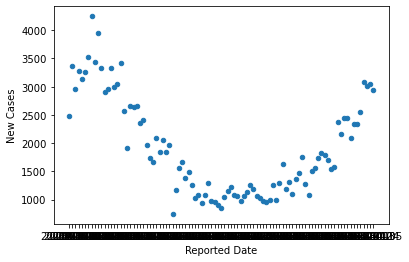

In [13]:
new_cases_df = merged_df[['Reported Date', 'New Cases']]

x = merged_df['id']
y = merged_df['New Cases']

new_cases_df.plot.scatter(x='Reported Date', y='New Cases')

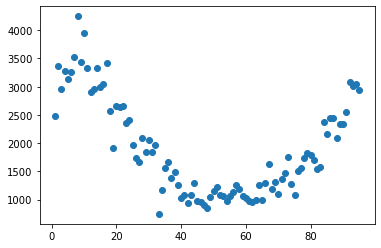

In [14]:


#create scatterplot
plt.scatter(x, y)

In [19]:

#polynomial fit with degree = 2
model = np.poly1d(np.polyfit(x, y, 2))

#add fitted polynomial line to scatterplot
polyline = np.linspace(1, 100, 50)
plt.scatter(x, y)
plt.plot(polyline, model(polyline))
plt.show()
print(model)

TypeError: can only concatenate str (not "float") to str

<AxesSubplot:xlabel='Reported Date', ylabel='New Deaths'>

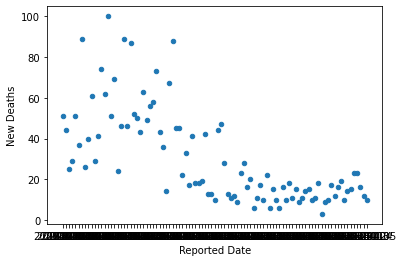

In [16]:
new_deaths_df = merged_df[['Reported Date', 'New Deaths']]

y = merged_df['New Cases']

new_deaths_df.plot.scatter(x='Reported Date', y='New Deaths')

<AxesSubplot:xlabel='Reported Date', ylabel='Number of patients hospitalized with COVID-19'>

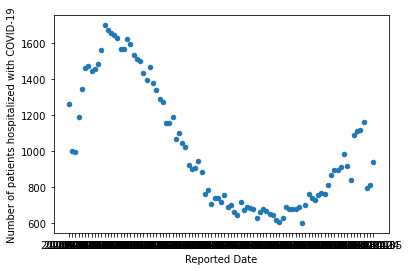

In [17]:
hospitalized_df = merged_df[['Reported Date', 'Number of patients hospitalized with COVID-19']]

y = merged_df['Number of patients hospitalized with COVID-19']

hospitalized_df.plot.scatter(x='Reported Date', y='Number of patients hospitalized with COVID-19')

<AxesSubplot:xlabel='Reported Date', ylabel='Doses Administered'>

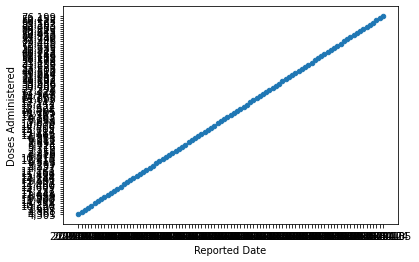

In [18]:
doses_df = merged_df[['Reported Date', 'Doses Administered']]

y = merged_df['Doses Administered']

doses_df.plot.scatter(x='Reported Date', y='Doses Administered')